## Examples and tests PE



# alternative inserts 
import networkx as nx

In [7]:
import rl_parkingplacefinder
from rl_parkingplacefinder import *
import matplotlib.pyplot as plt
from rl_parkingplacefinder import Parking_lot
from rl_parkingplacefinder.Parking_lot import Parking_Lot

In [8]:
ffp = Parking_lot.Filling_Function_Parameters(uniform_distribution_p_value = 0.5)

In [9]:
ldp = Parking_lot.Lane_Direction_Parameters()

['number_of_lanes=23']
['number_of_slots=529']


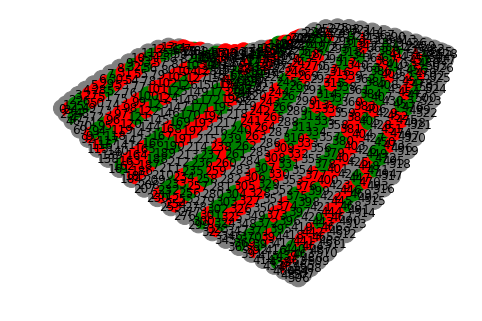

In [14]:
parking_lot = Parking_Lot(lane_direction_paramenters=ldp, 
                         filling_function_parameters=ffp, 
                         nr_parking_slots_per_lane=21,
                         nr_parking_lanes=12, 
                         parking_lane_depth=2, 
                         debug=True,
                         draw_graph = True,
                         show_summary = False
                        )

In [12]:
found_slot = -1
agent = Park_Finder_Agent()
found_slot = agent.find_parking(parking_lot)
parking_lot.plot()

TypeError: __init__() missing 1 required positional argument: 'parking_lot'

To create the agent I added a new dictionary object with key "ocuppation" and possible values "vacant" and "taken" to each "park" node. 

In [15]:
parking_lot.export_to_pickle()

In [6]:
# Example for node found_slot, an occupied parking spot
parking_lot.g.nodes[found_slot]

{'slot_type': 'park', 'occupation': 'taken'}